In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
print(tf.__version__)

2.4.0


- Eager execution means that you can now interact with TF 2.0 line by line in google colab or jupyter notebook without the need to define a graph and run sessions and all that we had with tensorflow 1.0.
- Easier to build and debug DL models  
 

In [ ]:
tensor_const = tf.constant([[1, 2], [5, 3]]) #Creates a constant tensor from a tensor-like object.
print(tensor_const)

tf.Tensor(
[[1 2]
 [5 3]], shape=(2, 2), dtype=int32)


In [ ]:
## Shape of a tensor
tensor_const.shape

TensorShape([2, 2])

In [ ]:
# Creating session than retrieving values are tedious value can be directly retrieved in 2.0
tensor_const.numpy()

array([[1, 2],
       [5, 3]], dtype=int32)

In [ ]:
tf.int32 == np.int32 # True

True

In [ ]:
#Can pass numpy types to TensorFlow ops
tf.ones([2, 2], np.float32) # ⇒ [[1.0 1.0], [1.0 1.0]]

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.]], dtype=float32)>

In [ ]:
# #We are able to convert a numpy matrix back to a TensorFlow tensor as well
# TensorFlow integrates seamlessly with NumPy
numpy_array = np.array([[5,  10], [3, 2]])
tensor_array = tf.constant(numpy_array)
tensor_array

<tf.Tensor: shape=(2, 2), dtype=int64, numpy=
array([[ 5, 10],
       [ 3,  2]])>

Basic Operations in tensor

In [ ]:
# Constants are fixed value tensors
var1 = tf.constant([[11, 12], [13, 14]])
var1

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[11, 12],
       [13, 14]], dtype=int32)>

**Operations with scalars**

In [ ]:
var1 + 2

In [ ]:
var1 * 5

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[55, 60],
       [65, 70]], dtype=int32)>

In [ ]:
#Squaring all numbers in a tensorflow tensor object
np.square(var1)

array([[121, 144],
       [169, 196]], dtype=int32)

In [ ]:
np.sqrt(var1)   #Square root of all numbers in a tensorflow tensor object

array([[3.31662479, 3.46410162],
       [3.60555128, 3.74165739]])

In [ ]:
y = np.dot(var1, tensor_const)
print(y)
print(var1)
print(tensor_const)

[[71 58]
 [83 68]]
tf.Tensor(
[[11 12]
 [13 14]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[1 2]
 [5 3]], shape=(2, 2), dtype=int32)


***Strings in Tensorflow***

In [ ]:
string_tensorflow = tf.constant("Welcome to Tensorflow Tutorials")
string_tensorflow

<tf.Tensor: shape=(), dtype=string, numpy=b'Welcome to NPIU Tensorflow Tutorials'>

In [ ]:
tf.strings.length(string_tensorflow)

<tf.Tensor: shape=(), dtype=int32, numpy=36>

In [ ]:
# Tensorflow 2.0 still works with graphs but enable eager execution by default
# Let's add the same variables together
import tensorflow as tf
x = tf.Variable(3)
y = tf.Variable(5)
z = tf.add(x,y) # immediate answer! 
print("The sum of x and y is:", z) # we get the answer immediately!
print(z.numpy())

The sum of x and y is: tf.Tensor(8, shape=(), dtype=int32)
8


- The second important feature in TF 2.0 is the use of keras as the high level API by default

- Keras syntax is similar to python that make it easy to learn.

- Explore loading and creating dataset using tensorflow

**Load Data using Tensorflow**
- Load Flowers images 

In [ ]:
## Loading Image data using Tensorflow
### Import statements
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import pathlib ## Module in Python which simplifies the way in working with files and folders
import PIL
import PIL.Image

In [ ]:
# Dataset of several thousand photos of flowers. The flowers dataset contains 5 sub-directories, one per class.
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

# Downloads a file from a URL if it not already in the cache.
data_dir = tf.keras.utils.get_file(origin=dataset_url, 
                                   fname='flower_photos', 
                                   untar=True) #untar=True open the following tgz file

data_dir = pathlib.Path(data_dir)
print(data_dir)

/root/.keras/datasets/flower_photos


In [ ]:
# After downloading (218MB), you should now have a copy of the flower photos available. There are 3670 total images:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


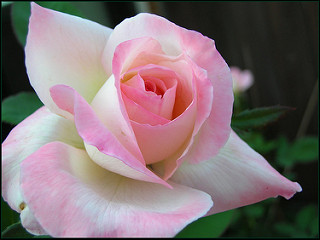

In [ ]:
### Each directory contains images of that type of flower
rose_dir = list(data_dir.glob('roses/*'))
PIL.Image.open(str(rose_dir[2]))

**Creating a Dataset using Keras.Preprocessing**

It's good practice to use a validation split when developing your model. We will use 70% of the images for training, and 30% for validation.

In [ ]:
# Define some parameters for the loader:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
# It turns image files sorted into class-specific folders into a well labelled dataset of
# image tensors which are of a definite shape.
# seed = Optional random seed for shuffling and transformations.
dataset_for_training = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.3,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2569 files for training.


In [ ]:
dataset_for_validation = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.3,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 1101 files for validation.


class_names attribute is used to find class names on these datasets.





In [ ]:
class_names = dataset_for_training.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


**Visualise the training data** 

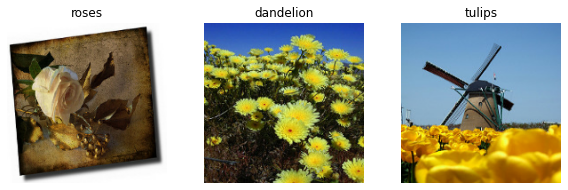

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, labels in dataset_for_training.take(1):
  for i in range(3):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off") 

**Load Text using Tensorflow**

In [ ]:
# TensorFlow Text provides a collection of text related classes and ops ready to use with TensorFlow 2.0. 
#The library can perform the preprocessing regularly required by text-based models, and includes other features useful for sequence modeling not provided by core TensorFlow.
%%capture
!pip install tensorflow-text

In [ ]:
import tensorflow_text as tf_text
import collections
import re
import string
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import preprocessing
from tensorflow.keras import utils
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
import tensorflow_datasets as tfds

In [ ]:
## Download a dataset of programming questions from Stack Overflow. Each question ("How do I sort a dictionary by value?") is labeled with exactly one tag (Python, CSharp, JavaScript, or Java)
data_url = 'https://storage.googleapis.com/download.tensorflow.org/data/stack_overflow_16k.tar.gz'
dataset = utils.get_file(
    'stack_overflow_16k.tar.gz',
    data_url,
    untar=True,
    cache_dir='stack_overflow',
    cache_subdir='')
dataset_dir = pathlib.Path(dataset).parent

In [ ]:
list(dataset_dir.iterdir())

[PosixPath('/tmp/.keras/test'),
 PosixPath('/tmp/.keras/README.md'),
 PosixPath('/tmp/.keras/train'),
 PosixPath('/tmp/.keras/stack_overflow_16k.tar.gz.tar.gz')]

In [ ]:
train_dir = dataset_dir/'train'
list(train_dir.iterdir())

[PosixPath('/tmp/.keras/train/javascript'),
 PosixPath('/tmp/.keras/train/csharp'),
 PosixPath('/tmp/.keras/train/java'),
 PosixPath('/tmp/.keras/train/python')]

In [ ]:
sample_file = train_dir/'python/1756.txt'
with open(sample_file) as f:
  print(f.read())

"blank pattern creating problen the task is as follows: ""you have to write a function pattern which returns the following pattern(see pattern &amp; examples) upto n number of rows"". my code works for small numbers but for big numbers it does not. any ideas why???..example pattern(5)..54321.5432.543.54.5...here's my (rather clumsy looking) attempt:..def pattern(n):.    if n &lt; 1:.        return """"..    num_range = range(n+1).    rev_num = [].    for number in reversed(num_range):.        rev_num.append(number).    joined_rev_num = ''.join(str(e) for e in rev_num).    joined_str = joined_rev_num.replace('0', '')..    l = [].    rang = n.    for digit in joined_str:.        l.append(joined_str[0:rang]).        l.append('n').        rang -= 1.    del l[-1]       .    final_string = str(''.join(str(e) for e in l)).    print final_string"



In [ ]:
batch_size = 32
seed = 42

raw_train_ds = preprocessing.text_dataset_from_directory(
    train_dir,
    batch_size=batch_size,
    validation_split=0.2,
    subset='training',
    seed=seed)

Found 8000 files belonging to 4 classes.
Using 6400 files for training.


In [ ]:
for text_batch, label_batch in raw_train_ds.take(1):
    print("Question: ", text_batch.numpy()[i][:100], '...')
    print("Label:", label_batch.numpy()[i])

Question:  b'"option and validation in blank i want to add a new option on my system where i want to add two text' ...
Label: 1


In [ ]:
for i, label in enumerate(raw_train_ds.class_names):
  print("Label", i, "corresponds to", label)

Label 0 corresponds to csharp
Label 1 corresponds to java
Label 2 corresponds to javascript
Label 3 corresponds to python


**Load Audio using Tensorflow**

An audio wave consist of time series data with a set number of samples per second. The sample represent the amplitude of audio signal at that specific time. In 16-bit the value range is between -32768 to 32767 and sampling rate is 160000
Note :  tf.audio.decode_wav will normalize the values to the range [-1.0, 1.0].
- one second audio clip as "down", "go", "left", "no", "right", "stop", "up" and "yes".

In [ ]:
#@title Import all required libraries
import os
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras import layers
from tensorflow.keras import models
from IPython import display

In [ ]:
# Extract the mini_speech_commands.zip and load it in using the tf.data API.
data_dir = pathlib.Path('data/mini_speech_commands')
if not data_dir.exists():
  tf.keras.utils.get_file(
      'mini_speech_commands.zip',
      origin="http://storage.googleapis.com/download.tensorflow.org/data/mini_speech_commands.zip",
      extract=True,
      cache_dir='.', cache_subdir='data')

In [ ]:
# Check basic statistics about the dataset
commands = np.array(tf.io.gfile.listdir(str(data_dir)))
commands = commands[commands != 'README.md']
print('Commands:', commands)

Commands: ['go' 'left' 'right' 'up' 'no' 'down' 'stop' 'yes']


In [ ]:
# Extract the audio files into a list and shuffle it.
filenames = tf.io.gfile.glob(str(data_dir) + '/*/*')
filenames = tf.random.shuffle(filenames)
num_samples = len(filenames)
print('Number of total examples:', num_samples)
print('Number of examples per label:',
      len(tf.io.gfile.listdir(str(data_dir/commands[0]))))
print('Example file tensor:', filenames[0])

Number of total examples: 8000
Number of examples per label: 1000
Example file tensor: tf.Tensor(b'data/mini_speech_commands/right/33f60c62_nohash_1.wav', shape=(), dtype=string)


In [ ]:
# Split the files into training, validation and test sets using a 80:10:10 ratio, respectively.
train_files = filenames[:6400]
val_files = filenames[6400: 6400 + 800]
test_files = filenames[-800:]

print('Training set size', len(train_files))
print('Validation set size', len(val_files))
print('Test set size', len(test_files))

Training set size 6400
Validation set size 800
Test set size 800


In [ ]:
# To load an audio file, you will use tf.audio.decode_wav, which returns the WAV-encoded audio as a Tensor and the sample rate.
def decode_audio(audio_binary):
  audio, _ = tf.audio.decode_wav(audio_binary)
  return tf.squeeze(audio, axis=-1)

In [ ]:
def get_label(file_path):
  parts = tf.strings.split(file_path, os.path.sep)
  # Note: We will use indexing here instead of tuple unpacking to enable this 
  # to work in a TensorFlow graph.
  return parts[-2]

In [ ]:
# Define a method that will take in the filename of the WAV file and output a tuple containing the audio and labels for supervised training.
def get_waveform_and_label(file_path):
  label = get_label(file_path)
  audio_binary = tf.io.read_file(file_path)
  waveform = decode_audio(audio_binary)
  return waveform, label

In [ ]:
# We will now apply process_path to build our training set to extract the audio-label pairs and check the results.
# Build the validation and test sets using a similar procedure later on.

AUTOTUNE = tf.data.experimental.AUTOTUNE # which will prompt the tf.data runtime to tune the value dynamically at runtime. #parallelism
files_ds = tf.data.Dataset.from_tensor_slices(train_files)
waveform_ds = files_ds.map(get_waveform_and_label, num_parallel_calls=AUTOTUNE)

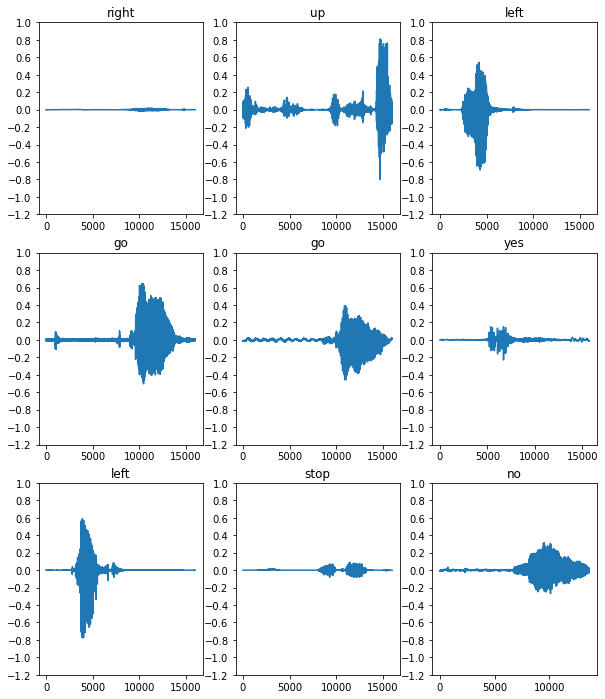

In [ ]:
# Let's examine a few audio waveforms with their corresponding labels.
rows = 3
cols = 3
n = rows*cols
fig, axes = plt.subplots(rows, cols, figsize=(10, 12))
for i, (audio, label) in enumerate(waveform_ds.take(n)):
  r = i // cols
  c = i % cols
  ax = axes[r][c]
  ax.plot(audio.numpy())
  ax.set_yticks(np.arange(-1.2, 1.2, 0.2))
  label = label.numpy().decode('utf-8')
  ax.set_title(label)

plt.show()

**Tensorboard**

TensorBoard provides the visualization and tooling needed for machine learning experimentation:
- Tracking and visualizing metrics such as loss and accuracy
- Visualizing the model graph (ops and layers)
- Viewing histograms of weights, biases, or other tensors as they change over time
- Projecting embeddings to a lower dimensional space
- Displaying images, text, and audio data


**Books you can refer**
- TensorFlow for Machine Intelligence (TFFMI)
- Hands-On Machine Learning with Scikit-Learn and TensorFlow. Chapter 9:
Up and running with TensorFlow
- Fundamentals of Deep Learning. Chapter 3: Implementing Neural Networks
in TensorFlow (FODL)

Best Resource : https://www.tensorflow.org/ 